In [44]:
import cv2
import os
import imghdr

In [45]:
data_dir='data'

In [46]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_422324544_dGkMainSTtUALfKg2LqDXd6urJ9FRASu.jpg',
 '11096052bf9e2b86ea304ae01ff252f6.jpg',
 '114303686-happy-littleE2808B-boy-smiley-face-E2808B-portrait-human-concept.jpg',
 '171120-smile-stock-njs-333p.jpg',
 '1786676-happy-man-smiling-face-sun-garden-meeting-to-talk-photocase-stock-photo-large.jpeg',
 '19-Beautiful-Smile-Quotes-For-Your-Children-1-267x300.jpg',
 '19eedf58c6a884eaec995907d3b4fe95.jpg',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '23-239534_our-smileys-for-your-business-u2013-because-happy.png',
 '249421-keep-smiling-human-being-masculine-mouth-teeth-photocase-stock-photo-large.jpeg',
 '292115365.jpg',
 '313625278.jpg',
 '318978451.jpg',
 '337cc3b3cf5322b7bf96b4a559d47e3f.jpg',
 '35438_hd.jpg',
 '368a2a55887be8795c17a2fac55e65b4.jpg',
 '378ffa7b4bc07f190ee35f85ed816377.jpg',
 '41740_hd.jpg',
 '41874438-men-smiling-human-face.jpg',
 '42120239-men-human-face-smiling.jpg',
 '5

In [47]:
image_exts=['jpeg','jpg','bmp','png']

In [48]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [49]:
from matplotlib import pyplot as plt

In [50]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [51]:
import numpy as np
import tensorflow as tf

In [52]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 705 files belonging to 2 classes.


In [53]:
data_iterator=data.as_numpy_iterator()

In [54]:
data_iterator

In [55]:
batch= data_iterator.next()

In [56]:
batch[0].shape

(32, 256, 256, 3)

In [57]:
batch[1]

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

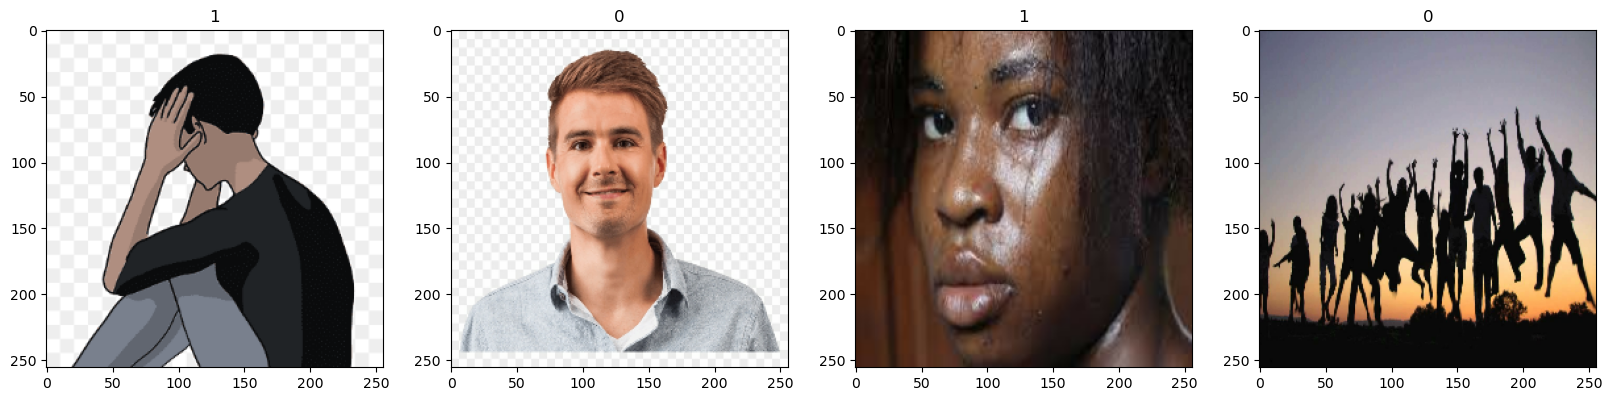

In [58]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [59]:
data=data.map(lambda x,y:(x/255,y))

In [60]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.00392157, 0.00784314, 0.01568628],
          [0.00686275, 0.00686275, 0.01470588],
          [0.00784314, 0.00784314, 0.01568628]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.01176471, 0.01176471, 0.01960784],
          [0.00686275, 0.00686275, 0.01470588],
          [0.00784314, 0.00784314, 0.01568628]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.01960784, 0.01176471, 0.02352941],
          [0.01176471, 0.01176471, 0.01960784],
          [0.01176471, 0.01176471, 0.01960784]],
 
         ...,
 
         [[0.09705883, 0.09803922, 0.10588235],
          [0.09411

In [61]:
scaled_iterator=data.as_numpy_iterator()

In [62]:
scaled_iterator.next()[0].max()

1.0

In [63]:
len(data)

23

In [64]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [65]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [67]:
model=Sequential()

In [68]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [69]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [70]:
logdir='logs'

In [71]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist=model.fit(train,epochs=25,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/25


16/16 [==============================] - 9s 485ms/step - loss: 0.8347 - accuracy: 0.4844 - val_loss: 0.6851 - val_accuracy: 0.4219
Epoch 2/25
16/16 [==============================] - 9s 545ms/step - loss: 0.6834 - accuracy: 0.5742 - val_loss: 0.6527 - val_accuracy: 0.5391
Epoch 3/25
16/16 [==============================] - 9s 505ms/step - loss: 0.5588 - accuracy: 0.7168 - val_loss: 0.5301 - val_accuracy: 0.7344
Epoch 4/25
16/16 [==============================] - 8s 462ms/step - loss: 0.4998 - accuracy: 0.7461 - val_loss: 0.6450 - val_accuracy: 0.7266
Epoch 5/25
16/16 [==============================] - 9s 491ms/step - loss: 0.4630 - accuracy: 0.7754 - val_loss: 0.5013 - val_accuracy: 0.7734
Epoch 6/25
16/16 [==============================] - 8s 486ms/step - loss: 0.4131 - accuracy: 0.8086 - val_loss: 0.4459 - val_accuracy: 0.7656
Epoch 7/25
16/16 [==============================] - 10s 586ms/step - loss: 0.4377 - accuracy: 0.7949 - val_loss: 0.3830 - val_accuracy: 0.8438
Epoch 8/25
16/16

In [73]:
hist.history

{'loss': [0.8347319960594177,
  0.683404803276062,
  0.5588146448135376,
  0.49980291724205017,
  0.46301761269569397,
  0.41311129927635193,
  0.437676340341568,
  0.3557214140892029,
  0.3187350630760193,
  0.30351585149765015,
  0.25821805000305176,
  0.23471897840499878,
  0.2468615621328354,
  0.16325567662715912,
  0.1602867990732193,
  0.12766052782535553,
  0.13060715794563293,
  0.08657252043485641,
  0.06356047838926315,
  0.02702057734131813,
  0.04073842614889145,
  0.02942478097975254,
  0.024466626346111298,
  0.010507931001484394,
  0.026148656383156776],
 'accuracy': [0.484375,
  0.57421875,
  0.716796875,
  0.74609375,
  0.775390625,
  0.80859375,
  0.794921875,
  0.865234375,
  0.859375,
  0.87109375,
  0.900390625,
  0.908203125,
  0.896484375,
  0.953125,
  0.94140625,
  0.951171875,
  0.962890625,
  0.974609375,
  0.984375,
  0.99609375,
  0.990234375,
  0.990234375,
  0.994140625,
  0.998046875,
  0.99609375],
 'val_loss': [0.6850806474685669,
  0.6527069807052612

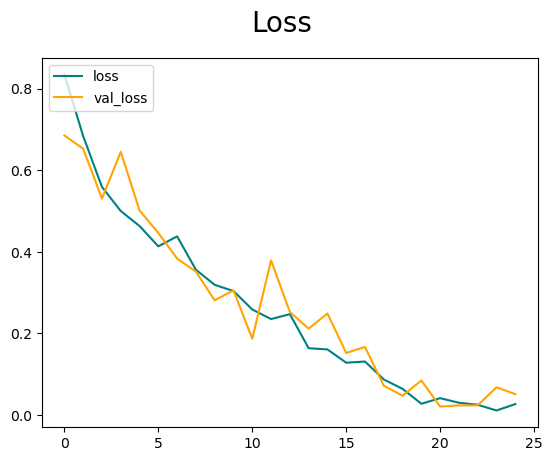

In [74]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

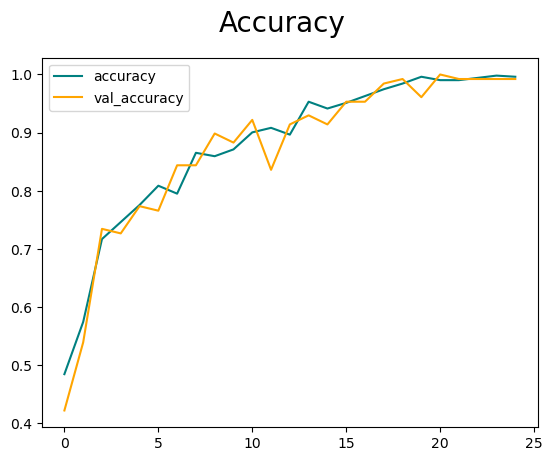

In [75]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [76]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [77]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [78]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 131ms/step


In [79]:
pre.result().numpy()

0.9736842

In [80]:
re.result().numpy()

1.0

In [81]:
acc.result().numpy()

0.984375

In [82]:
import cv2

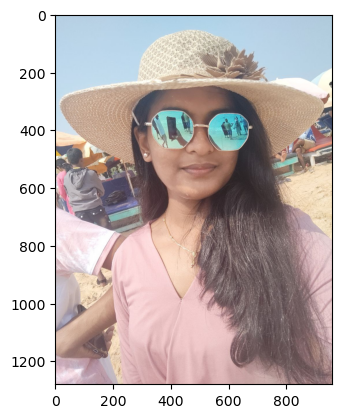

In [83]:
img=cv2.imread('Image Classification\\sunnethri.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

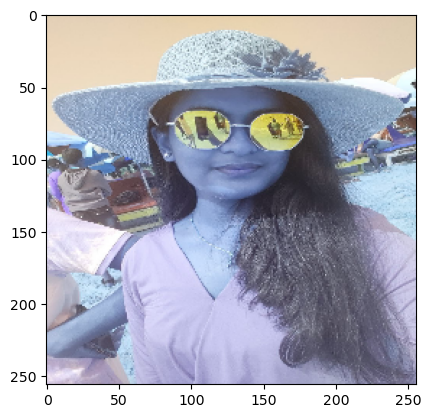

In [84]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 88ms/step


In [86]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


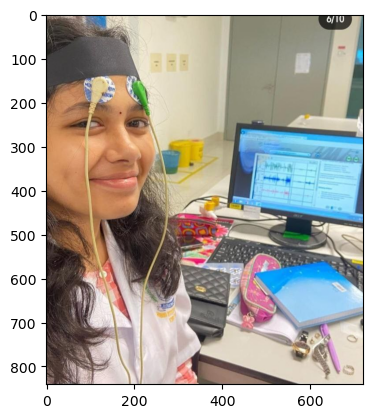

In [87]:
img=cv2.imread('Image Classification\\gf-test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

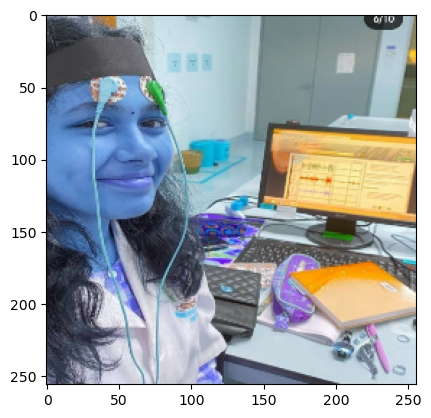

In [88]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [89]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 28ms/step


In [90]:
yhat

array([[2.2145657e-07]], dtype=float32)

In [91]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


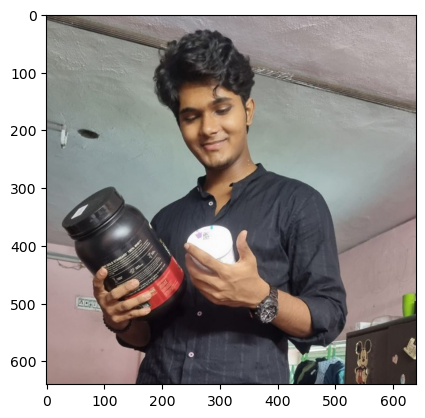

In [92]:
img=cv2.imread('Image Classification\\vishal_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

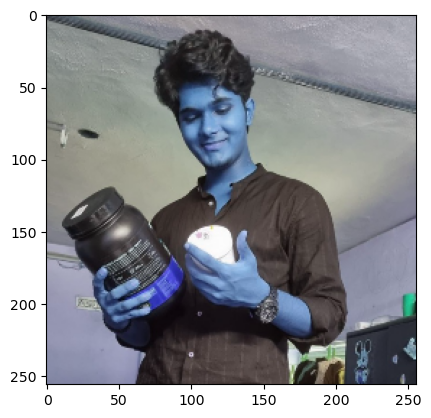

In [93]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [95]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


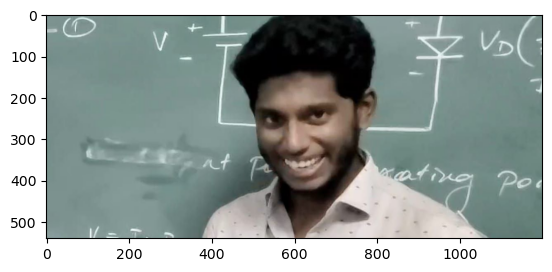

In [107]:
img=cv2.imread('Image Classification\\tenrasu.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

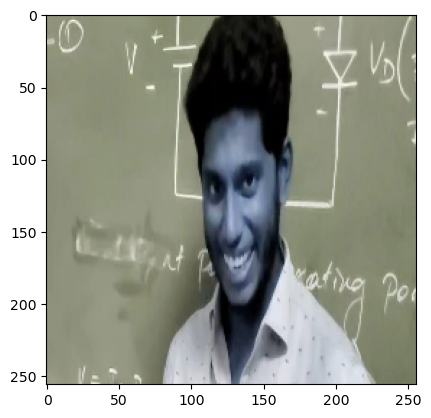

In [109]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 24ms/step


In [111]:
yhat

array([[0.999496]], dtype=float32)

In [112]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [101]:
from tensorflow.keras.models import load_model

In [102]:
model.save(os.path.join('models','happysadmodel_Version1.1.h5'))

c:\Users\VICTUS\.vscode\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [103]:
new_model=load_model(os.path.join('models','happysadmodel_Version1.1.h5'))

In [104]:
new_model

In [105]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 81ms/step


In [106]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
